# Lab 1 - Linear Regression - Brent Samaha

In [239]:
#importing packages to be used
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tools import eval_measures
import matplotlib.pyplot as plt

## Question 1. Reading in data sets

In [197]:
train_data = pd.read_csv('train_2017.csv')

In [198]:
property_data = pd.read_csv('properties_2017.csv', low_memory=False)

## Question 2. Merging train and property data sets

In [199]:
merged_data = pd.merge(train_data, property_data, how = "inner", on = ["parcelid"])

In [200]:
merged_data.shape

(77613, 60)

There are 77613 rows and 60 columns in the merged data set.

## Question 3. Creating test and train subsets 

In [201]:
training, test = train_test_split(merged_data, test_size=0.3, train_size=0.7)

In [202]:
training.shape

(54329, 60)

In [203]:
test.shape

(23284, 60)

The training data subset has 54,329 rows (70%) and the test data subset has 23,238 rows (30%).

## Question 4. Descriptive stats of logerror

In [204]:
print('The mean of logerror in the training data set is', training.logerror.mean())

The mean of logerror in the training data set is 0.016888455521446195


In [205]:
print('The median of logerror in the training data set is', training.logerror.median())

The median of logerror in the training data set is 0.006777687728680001


In [206]:
training_logerror_range = (training.logerror.max() - training.logerror.min())
print('The training logerror range is, ', training_logerror_range)

The training logerror range is,  9.918419027439999


In [207]:
print('The standard deviation of logerror in the training data set is', training.logerror.std())

The standard deviation of logerror in the training data set is 0.1701042536733461


## Question 5. Columns with missing values

In [208]:
missing = merged_data.isna().any()
missing[missing == True]

airconditioningtypeid           True
architecturalstyletypeid        True
basementsqft                    True
bathroomcnt                     True
bedroomcnt                      True
buildingclasstypeid             True
buildingqualitytypeid           True
calculatedbathnbr               True
decktypeid                      True
finishedfloor1squarefeet        True
calculatedfinishedsquarefeet    True
finishedsquarefeet12            True
finishedsquarefeet13            True
finishedsquarefeet15            True
finishedsquarefeet50            True
finishedsquarefeet6             True
fips                            True
fireplacecnt                    True
fullbathcnt                     True
garagecarcnt                    True
garagetotalsqft                 True
hashottuborspa                  True
heatingorsystemtypeid           True
latitude                        True
longitude                       True
lotsizesquarefeet               True
poolcnt                         True
p

## Question 6. Replace missing values with mean - taxamount, roomcnt, basementsqft, garagetotalsqft, garagecarcnt

In [209]:
training.info() #checking for numerical variables 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54329 entries, 4000 to 4596
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      54329 non-null  int64  
 1   logerror                      54329 non-null  float64
 2   transactiondate               54329 non-null  object 
 3   airconditioningtypeid         17451 non-null  float64
 4   architecturalstyletypeid      151 non-null    float64
 5   basementsqft                  36 non-null     float64
 6   bathroomcnt                   54300 non-null  float64
 7   bedroomcnt                    54300 non-null  float64
 8   buildingclasstypeid           13 non-null     float64
 9   buildingqualitytypeid         34945 non-null  float64
 10  calculatedbathnbr             53868 non-null  float64
 11  decktypeid                    423 non-null    float64
 12  finishedfloor1squarefeet      4194 non-null   float64
 13 

In [210]:
mean_taxamount = training.taxamount.mean()
print(mean_taxamount)

5974.658845608387


In [211]:
mean_roomcnt = training.roomcnt.mean()
mean_roomcnt

1.47902394106814

In [212]:
mean_basementsqft = training.basementsqft.mean()
mean_basementsqft

650.6666666666666

In [213]:
mean_garagetotalsqft = training.garagetotalsqft.mean()
mean_garagetotalsqft

349.7475189234651

In [214]:
mean_garagecarcnt = training.garagecarcnt.mean()
mean_garagecarcnt

1.815138772077376

In [215]:
#wanted to create new columns for my ease of access
training['fixed_taxamount']=training.taxamount.fillna(mean_taxamount)
test['fixed_taxamount']=test.taxamount.fillna(mean_taxamount)
training['fixed_roomcnt']=training.roomcnt.fillna(mean_roomcnt)
test['fixed_roomcnt']=test.roomcnt.fillna(mean_roomcnt)
training['fixed_basementsqft']=training.basementsqft.fillna(mean_basementsqft)
test['fixed_basementsqft']=test.basementsqft.fillna(mean_basementsqft)
training['fixed_garagetotalsqft']=training.garagetotalsqft.fillna(mean_garagetotalsqft)
test['fixed_garagetotalsqft']=test.garagetotalsqft.fillna(mean_garagetotalsqft)
training['fixed_garagecarcnt']=training.garagecarcnt.fillna(mean_garagecarcnt)
test['fixed_garagecarcnt']=test.garagecarcnt.fillna(mean_garagecarcnt)

In [216]:
#ensuring the new columns are not missing values
training.isna().any()

parcelid                    False
logerror                    False
transactiondate             False
airconditioningtypeid        True
architecturalstyletypeid     True
                            ...  
fixed_taxamount             False
fixed_roomcnt               False
fixed_basementsqft          False
fixed_garagetotalsqft       False
fixed_garagecarcnt          False
Length: 65, dtype: bool

In [217]:
#ensuring the new columns are not missing values
test.isna().any()

parcelid                    False
logerror                    False
transactiondate             False
airconditioningtypeid        True
architecturalstyletypeid     True
                            ...  
fixed_taxamount             False
fixed_roomcnt               False
fixed_basementsqft          False
fixed_garagetotalsqft       False
fixed_garagecarcnt          False
Length: 65, dtype: bool

The tails of the two data frames show that the last five columns entered are the variables that were replaced with that variable's mean from the training data set.

## Question 7. Run linear regression model

In [220]:
training_variables = training[['logerror','fixed_taxamount', 'fixed_roomcnt', 'fixed_basementsqft', 'fixed_garagetotalsqft', 'fixed_garagecarcnt']]

In [221]:
linear_model = smf.ols(formula='logerror ~ fixed_taxamount + fixed_roomcnt + fixed_basementsqft + fixed_garagetotalsqft + fixed_garagecarcnt', data = training_variables).fit()

## Question 8. Getting values for model developed

In [222]:
linear_model.rsquared

0.0006815883785508126

In [223]:
linear_model.pvalues

Intercept                0.073061
fixed_taxamount          0.073663
fixed_roomcnt            0.029997
fixed_basementsqft       0.055232
fixed_garagetotalsqft    0.017401
fixed_garagecarcnt       0.109367
dtype: float64

In [224]:
logerror_prediction = linear_model.predict(training_variables[['fixed_taxamount', 'fixed_roomcnt', 'fixed_basementsqft', 'fixed_garagetotalsqft', 'fixed_garagecarcnt']])
logerror_prediction

4000     0.015915
9637     0.011076
34075    0.016479
49500    0.022846
26581    0.016494
           ...   
4039     0.016815
102      0.026494
65920    0.016831
27609    0.016546
4596     0.032508
Length: 54329, dtype: float64

In [229]:
eval_measures.rmse(training_variables.logerror, logerror_prediction)

0.1700447082757242

In [230]:
meanabserror=MAE(training['logerror'],logerror_prediction)
meanabserror

0.07083765234231666

## Question 9. Checking model generalization

In [233]:
test_variables = test[['logerror','fixed_taxamount', 'fixed_roomcnt', 'fixed_basementsqft', 'fixed_garagetotalsqft', 'fixed_garagecarcnt']]

In [234]:
testpred = linear_model.predict(test_variables[['fixed_taxamount', 'fixed_roomcnt', 'fixed_basementsqft', 'fixed_garagetotalsqft', 'fixed_garagecarcnt']])
testpred

1641     0.016248
36874    0.007258
11779    0.006953
63885    0.007252
69550    0.011247
           ...   
31812    0.010563
7460     0.015832
75939    0.019617
62181    0.021289
68071    0.016763
Length: 23284, dtype: float64

In [236]:
eval_measures.rmse(test_variables.logerror, testpred)

0.17266902350781982

In [238]:
meanabserrortest=MAE(test['logerror'], testpred)
meanabserrortest

0.07072873965695656

Part C. Using the model with the training data set, the RMSE came to be .170, and using the model with the test data, the RMSE came out to be .173, a difference of .003. With the training dataset, the MAE came to be .071, and with the test dataset, the MAE was .071 (rounded). Given the noted differences between the training and validation RMSE and MAE, I would respond taht the model generalizes well to unseen data.

## Question 10. Plot of validation dataset's logerror values

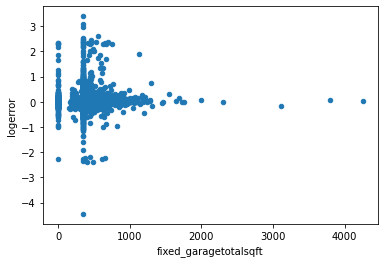

In [244]:
test.plot.scatter(x = 'fixed_garagetotalsqft', y = 'logerror')

## Question 11. Correlation of variables

In [246]:
test_variables.corr()

,logerror,fixed_taxamount,fixed_roomcnt,fixed_basementsqft,fixed_garagetotalsqft,fixed_garagecarcnt
logerror,1.000000,0.015037,0.013977,0.012418,0.021533,0.017140
fixed_taxamount,0.015037,1.000000,-0.034636,0.007210,0.120002,0.113839
fixed_roomcnt,0.013977,-0.034636,1.000000,0.022073,0.275466,0.134736
fixed_basementsqft,0.012418,0.007210,0.022073,1.000000,0.023572,0.042671
fixed_garagetotalsqft,0.021533,0.120002,0.275466,0.023572,1.000000,0.641303
fixed_garagecarcnt,0.017140,0.113839,0.134736,0.042671,0.641303,1.000000


The only variables that have a noticeable strong correlation is fixed_garagecarcnt and fixed_garagetotalsqft. This makes logical sense as the variables describe the square footage of a garage and the number of cars that can fit in a garage; the higher square footage of the garage allows you to fit more cars.

Most of the values do not have any strong correlation, and only the variables concering room count and tax amount have a negative correlation. With this information, we could take a backward elimination variable selection, removing 1 variable from a pair with a high correlation could assist as two highly correlated variables may not improve a model further.

## Question 12. Skip - thanks! Seems interesting though, will try on my own.

## Question 13. Improvements

From here, I would try to improve my model and focus on trying to boost the rsquared value. To do this, I would try a forward selection process - as we have additional variables. I would look at correlations between all available variables and in a forward selection process, add specific variables that lack strong correlations with others. My thinking behind this is seeing if there is a unique factor (variable) that has a strong effect on logerror.

To further improve the model I would also go through the outliers, like the ones seen in the plot above regarding garage square feet. These may be throwing off the model and as seen in the plot, there are multiple outliers, other variables are probably similar. 

Lastly, I believe that categorical variables like architectual style type could offer more insight - something that could be done through data exploration, test it within the model, & evaluate the p-value. 